# Coding Project: Deep Learning Basics

* ### Based on the paper:K. He, X. Zhang, S. Ren and J. Sun, “Deep Residual Learning for Image Recognition,” IEEE Conference on Computer Vision and Pattern Recognition (CVPR),2016.

* ### Assignment

  1. Get familiar with our coding environment (on cloud)!
  2. Find a codebase of this paper, download the CIFAR10 and CIFAR100 datasets
  3. Run the basic code on the server, with deep residual networks with 20, 56 and 110 layers, and obtain results (3-time average) on both CIFAR10 and CIFAR100
  4. Finish the required task and one of the optional tasks (see the following slides) –of course, you can do more than one optional tasks if you wish (bonus points)
  5. If you have more ideas, please specify a new task by yourself (bonus points)
  6. Remember: integrate your results into your reading report
  7. Submit your report(as PDF) and code (as README doc) on the iLearningX: https://ilearningx-ru.huaweiuniversity.com/courses/course-v1:HuaweiX+WHURU001+Self-paced/courseware/8825cc7815fa444696520baaf31fa2b0/77b7babd6ae34949bc209d7a8f0ba409/(8)  

Date assigned: Oct. 15, 2019;    Date Due: Dec 31, 2019

## Optional Task 1

* Changing hyper-parameters
    * Based on the results of the basic (required) experiments
    * How does the change of hyper-parameters impact final performance?
* Questions to be discussed in the report
    * What if we multiply the base learning rate by 10, 5, 2, or by 1/10, 1/5, 1/2?
    * What if we double the number of training epochs? What if we half it? Note that the learning rate policy should be adjusted accordingly (please specify details)
    * What if we only use 1/2 or 1/5 of training data? What if we double or half the size of mini-batch? Note that for fair comparison, you need to keep the number of training samples (iterations x batchsize) unchanged
    * Note: do not simply report accuracy, discussion on reasons is expected!

## Preparation
One time installation of required libraries from requirement.txt and creating data path

In [1]:
!pip install -r requirements.txt
!mkdir data

    100% |████████████████████████████████| 61kB 71.6MB/s ta 0:00:01
    100% |████████████████████████████████| 686kB 93.9MB/s ta 0:00:01B/s eta 0:00:01
    100% |████████████████████████████████| 204kB 104.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for torchnet ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/54/7e/85/0e5071d02c5d0cf37cfd9fd437b71a2281fb71b1f89197edc5
  Running setup.py bdist_wheel for visdom ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/97/83/ee/4e0ef1aaffc3f1a81caa2bef44df43a1dd42ebcd3fbe99096e
  Running setup.py bdist_wheel for torchfile ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/3f/13/e6/01b1c6b1d3a90163bf6a9efaec1ca4a95f519220a93aa7ce81
Successfully built torchnet visdom torchfile
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pi

Downloading CIFAR10 and CIFAR100 datasets

In [2]:
from dataset.dataset_dowloader_ import *

cifar10_dowloader()
cifar100_dowloader()

Successfully download file cv-course-public/coding-1/cifar-10-python.tar.gz from OBS to local ./data/cifar-10-python.tar.gz
Successfully download file cv-course-public/coding-1/cifar-100-python.tar.gz from OBS to local ./data/cifar-100-python.tar.gz


## The basic training and testing pipeline

### What if we multiply the base learning rate by 10, 5, 2, or by 1/10, 1/5, 1/2?

* `lr_multipliers = [1, 10, 5, 2, 0.1, 0.2, 0.5]` - define learning rate multipliers (base learning rate is 1*0.1)
* `history_lr = []` - define train/validation logs' container
* `auto_resnet(20, 100, lr_i, 180, history_lr)`:
    * `[3, 3, 3]` - ResNet20 model
    * `100` - CIFAR100 dataset
    * `lr_i` - learning rate multiplier
    * `180` - number of epochs

In [3]:
%%time
from auto_resnet import *

lr_multipliers = [1, 10, 5, 2, 0.1, 0.2, 0.5]
history_lr = []
for lr_i in lr_multipliers:
    # resnet20, cifar100
    auto_resnet([3, 3, 3], 100, lr_i, 180, history_lr)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

100%|██████████| 625/625 [00:12<00:00, 49.75it/s, loss:1.1894, acc:65.1850%]
Val loss: 1.7005, accuracy: 55.77%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.05it/s, loss:1.1811, acc:65.5175%]
Val loss: 1.7182, accuracy: 54.99%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.99it/s, loss:1.1787, acc:65.7600%]
Val loss: 1.6057, accuracy: 56.87%
Epoch: 80/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.71it/s, loss:1.1844, acc:65.3150%]
Val loss: 1.6325, accuracy: 56.45%
Epoch: 81/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.35it/s, loss:1.1820, acc:65.4575%]
Val loss: 1.7550, accuracy: 54.66%
Epoch: 82/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.44it/s, loss:1.1806, acc:65.3450%]
Val loss: 1.7064, accuracy: 56.96%
Epoch: 83/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.07it/s, loss:1.1790, acc:65.9275%]
Val loss: 1.7487, accuracy: 55.56%
Epoch: 84/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 50.18it/s, loss:0.4893, acc:84.5100%]
Val loss: 1.5155, accuracy: 64.52%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.91it/s, loss:0.4866, acc:84.7075%]
Val loss: 1.4557, accuracy: 65.14%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.21it/s, loss:0.4858, acc:84.6950%]
Val loss: 1.5176, accuracy: 64.42%
Epoch: 139/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.25it/s, loss:0.4212, acc:86.9400%]
Val loss: 1.4380, accuracy: 65.76%
Epoch: 140/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.77it/s, loss:0.3986, acc:87.9150%]
Val loss: 1.4238, accuracy: 66.00%
Epoch: 141/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 51.07it/s, loss:0.3899, acc:88.0425%]
Val loss: 1.4319, accuracy: 66.05%
Epoch: 142/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.82it/s, loss:0.3876, acc:88.1825%]
Val loss: 1.4250, accuracy: 65.84%
Epoch: 143/180, lr:1.00e-03
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e+00
100%|██████████| 625/625 [00:12<00:00, 49.43it/s, loss:4.4577, acc:2.3525%]
Val loss: 4.3913, accuracy: 3.67%
Epoch: 2/180, lr:1.00e+00
100%|██████████| 625/625 [00:12<00:00, 51.08it/s, loss:4.2109, acc:4.5000%]
Val loss: 4.2505, accuracy: 5.94%
Epoch: 3/180, lr:1.00e+00
100%|██████████| 625/625 [00:12<00:00, 50.47it/s, loss:3.9790, acc:7.7400%]
Val loss: 3.8907, accuracy: 8.48%
Epoch: 4/180, lr:1.00e+00
100%|██████████| 625/625 [00:12<00:00, 50.05it/s, loss:3.8446, acc:10.1750%]
Val loss: 4.1686, accuracy: 7.65%
Epoch: 5/180, lr:1.00e+00
100%|██████████| 625/625 [00:12<00:00, 49.57it/s, loss:3.7431, acc:11.6475%]
Val loss: 3.8998, accuracy: 8.79%
Epoch: 6/180, lr:1.00e+00
100%|██████████| 625/625 [00:12<00:00, 50.64it/s, loss:3.6549, acc:12.6725%]
Val loss: 4.2913, accuracy: 9.19%
Epoch: 7/180, lr:1.00e+00
100%|██████████| 625/625 [00:12<00:00, 50

100%|██████████| 625/625 [00:12<00:00, 50.37it/s, loss:2.0066, acc:44.6300%]
Val loss: 2.1864, accuracy: 41.88%
Epoch: 119/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.37it/s, loss:2.0042, acc:44.9400%]
Val loss: 2.3201, accuracy: 39.59%
Epoch: 120/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.95it/s, loss:2.0060, acc:44.6325%]
Val loss: 2.2533, accuracy: 41.64%
Epoch: 121/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.49it/s, loss:1.9985, acc:44.9250%]
Val loss: 2.3608, accuracy: 39.62%
Epoch: 122/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.10it/s, loss:1.9958, acc:45.1575%]
Val loss: 2.3063, accuracy: 40.10%
Epoch: 123/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.39it/s, loss:1.9920, acc:45.0850%]
Val loss: 2.2419, accuracy: 41.78%
Epoch: 124/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.57it/s, loss:1.9862, acc:45.0325%]
Val loss: 2.5011, accuracy: 38.39%
Epoch: 125/180, lr:1.00e-01
100%|██████████| 625

100%|██████████| 625/625 [00:12<00:00, 49.98it/s, loss:2.4311, acc:36.3925%]
Val loss: 2.7312, accuracy: 32.69%
Epoch: 14/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.31it/s, loss:2.4004, acc:36.9375%]
Val loss: 2.6235, accuracy: 34.21%
Epoch: 15/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.33it/s, loss:2.3692, acc:37.9525%]
Val loss: 2.6810, accuracy: 33.10%
Epoch: 16/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.11it/s, loss:2.3308, acc:38.6825%]
Val loss: 2.7459, accuracy: 32.52%
Epoch: 17/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.53it/s, loss:2.3101, acc:38.8025%]
Val loss: 2.4429, accuracy: 37.13%
Epoch: 18/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.13it/s, loss:2.2813, acc:39.8050%]
Val loss: 2.5934, accuracy: 33.89%
Epoch: 19/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.71it/s, loss:2.2705, acc:40.1625%]
Val loss: 2.6408, accuracy: 35.24%
Epoch: 20/180, lr:5.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 50.80it/s, loss:2.0097, acc:45.6800%]
Val loss: 2.5828, accuracy: 38.49%
Epoch: 73/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.95it/s, loss:2.0201, acc:45.5225%]
Val loss: 2.4731, accuracy: 39.22%
Epoch: 74/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.51it/s, loss:2.0032, acc:45.6500%]
Val loss: 2.6533, accuracy: 36.28%
Epoch: 75/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.66it/s, loss:2.0124, acc:45.4925%]
Val loss: 2.4188, accuracy: 39.54%
Epoch: 76/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.13it/s, loss:2.0116, acc:45.5075%]
Val loss: 2.3486, accuracy: 39.61%
Epoch: 77/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.23it/s, loss:2.0060, acc:45.7850%]
Val loss: 2.3764, accuracy: 39.46%
Epoch: 78/180, lr:5.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.17it/s, loss:1.9948, acc:45.8200%]
Val loss: 2.6459, accuracy: 36.94%
Epoch: 79/180, lr:5.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.72it/s, loss:1.0715, acc:68.1025%]
Val loss: 1.7693, accuracy: 55.30%
Epoch: 132/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.35it/s, loss:1.0774, acc:68.1625%]
Val loss: 1.6470, accuracy: 56.70%
Epoch: 133/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.99it/s, loss:1.0692, acc:68.1325%]
Val loss: 1.5423, accuracy: 59.39%
Epoch: 134/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.57it/s, loss:1.0706, acc:68.1800%]
Val loss: 1.6770, accuracy: 56.81%
Epoch: 135/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 51.09it/s, loss:1.0690, acc:68.0675%]
Val loss: 1.5670, accuracy: 58.97%
Epoch: 136/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.42it/s, loss:1.0507, acc:68.8475%]
Val loss: 1.6592, accuracy: 57.40%
Epoch: 137/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.53it/s, loss:1.0588, acc:68.5450%]
Val loss: 1.6647, accuracy: 56.54%
Epoch: 138/180, lr:5.00e-02
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.74it/s, loss:4.1205, acc:6.3650%]
Val loss: 3.9114, accuracy: 10.59%
Epoch: 2/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.30it/s, loss:3.6302, acc:13.5900%]
Val loss: 3.5056, accuracy: 16.09%
Epoch: 3/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.31it/s, loss:3.2985, acc:19.6650%]
Val loss: 3.3463, accuracy: 19.96%
Epoch: 4/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.45it/s, loss:3.0320, acc:24.3200%]
Val loss: 3.0624, accuracy: 25.53%
Epoch: 5/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.54it/s, loss:2.8266, acc:28.1250%]
Val loss: 2.8790, accuracy: 27.62%
Epoch: 6/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.65it/s, loss:2.6458, acc:32.1225%]
Val loss: 2.8669, accuracy: 29.50%
Epoch: 7/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<0

100%|██████████| 625/625 [00:12<00:00, 50.10it/s, loss:1.5373, acc:56.7725%]
Val loss: 1.8255, accuracy: 51.64%
Epoch: 60/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.66it/s, loss:1.5268, acc:57.1525%]
Val loss: 2.0029, accuracy: 49.06%
Epoch: 61/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.26it/s, loss:1.5256, acc:57.2150%]
Val loss: 2.2197, accuracy: 45.14%
Epoch: 62/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.06it/s, loss:1.5340, acc:56.9100%]
Val loss: 1.9857, accuracy: 47.31%
Epoch: 63/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.52it/s, loss:1.5133, acc:57.1675%]
Val loss: 2.1329, accuracy: 47.62%
Epoch: 64/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.30it/s, loss:1.5231, acc:57.1575%]
Val loss: 1.9820, accuracy: 48.46%
Epoch: 65/180, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.81it/s, loss:1.5268, acc:56.6525%]
Val loss: 1.8554, accuracy: 51.36%
Epoch: 66/180, lr:2.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 50.18it/s, loss:0.7096, acc:78.2100%]
Val loss: 1.3902, accuracy: 63.82%
Epoch: 119/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.47it/s, loss:0.7006, acc:78.2700%]
Val loss: 1.4230, accuracy: 63.76%
Epoch: 120/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.82it/s, loss:0.6962, acc:78.5600%]
Val loss: 1.4815, accuracy: 63.10%
Epoch: 121/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.84it/s, loss:0.6943, acc:78.5400%]
Val loss: 1.4403, accuracy: 62.88%
Epoch: 122/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.18it/s, loss:0.6940, acc:78.5850%]
Val loss: 1.4494, accuracy: 63.52%
Epoch: 123/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.43it/s, loss:0.6977, acc:78.5250%]
Val loss: 1.4582, accuracy: 63.61%
Epoch: 124/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.94it/s, loss:0.6928, acc:78.6250%]
Val loss: 1.4327, accuracy: 64.07%
Epoch: 125/180, lr:2.00e-02
100%|██████████| 625

100%|██████████| 625/625 [00:12<00:00, 50.16it/s, loss:1.9293, acc:46.6175%]
Val loss: 2.1647, accuracy: 43.30%
Epoch: 14/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.46it/s, loss:1.8701, acc:47.9650%]
Val loss: 2.1321, accuracy: 43.80%
Epoch: 15/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.63it/s, loss:1.8242, acc:48.9925%]
Val loss: 2.0017, accuracy: 46.41%
Epoch: 16/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.81it/s, loss:1.7645, acc:50.7075%]
Val loss: 1.9035, accuracy: 48.01%
Epoch: 17/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.24it/s, loss:1.7215, acc:51.8300%]
Val loss: 2.0359, accuracy: 46.57%
Epoch: 18/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.93it/s, loss:1.6720, acc:52.7900%]
Val loss: 1.9507, accuracy: 47.46%
Epoch: 19/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.90it/s, loss:1.6402, acc:53.9425%]
Val loss: 1.9684, accuracy: 47.43%
Epoch: 20/180, lr:1.00e-02
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 50.46it/s, loss:0.8894, acc:73.0825%]
Val loss: 1.6659, accuracy: 58.51%
Epoch: 73/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.90it/s, loss:0.8885, acc:73.1400%]
Val loss: 1.6909, accuracy: 58.13%
Epoch: 74/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 51.09it/s, loss:0.8825, acc:73.1075%]
Val loss: 1.6502, accuracy: 59.04%
Epoch: 75/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.35it/s, loss:0.8863, acc:72.9725%]
Val loss: 1.6267, accuracy: 59.14%
Epoch: 76/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.15it/s, loss:0.8702, acc:73.4525%]
Val loss: 1.6902, accuracy: 57.67%
Epoch: 77/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.21it/s, loss:0.8662, acc:73.7200%]
Val loss: 1.6367, accuracy: 58.81%
Epoch: 78/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.00it/s, loss:0.8616, acc:73.7500%]
Val loss: 1.6491, accuracy: 58.74%
Epoch: 79/180, lr:1.00e-02
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.80it/s, loss:0.4639, acc:85.5475%]
Val loss: 1.5819, accuracy: 62.85%
Epoch: 132/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.14it/s, loss:0.4652, acc:85.7350%]
Val loss: 1.5879, accuracy: 62.92%
Epoch: 133/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.42it/s, loss:0.4637, acc:86.0425%]
Val loss: 1.5796, accuracy: 62.44%
Epoch: 134/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.43it/s, loss:0.4700, acc:85.7200%]
Val loss: 1.5866, accuracy: 63.11%
Epoch: 135/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.76it/s, loss:0.4615, acc:85.9025%]
Val loss: 1.5912, accuracy: 62.98%
Epoch: 136/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.79it/s, loss:0.4579, acc:86.0500%]
Val loss: 1.6029, accuracy: 62.67%
Epoch: 137/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.52it/s, loss:0.4620, acc:85.8750%]
Val loss: 1.5939, accuracy: 62.82%
Epoch: 138/180, lr:1.00e-03
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.43it/s, loss:4.0709, acc:7.1125%]
Val loss: 3.7943, accuracy: 10.64%
Epoch: 2/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.62it/s, loss:3.5771, acc:13.9475%]
Val loss: 3.4661, accuracy: 16.10%
Epoch: 3/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.94it/s, loss:3.2047, acc:20.2500%]
Val loss: 3.2672, accuracy: 20.47%
Epoch: 4/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.64it/s, loss:2.9126, acc:25.7000%]
Val loss: 2.9110, accuracy: 26.40%
Epoch: 5/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.03it/s, loss:2.6772, acc:30.0775%]
Val loss: 2.8081, accuracy: 28.95%
Epoch: 6/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.27it/s, loss:2.4777, acc:34.2200%]
Val loss: 2.5296, accuracy: 34.31%
Epoch: 7/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<0

100%|██████████| 625/625 [00:12<00:00, 49.20it/s, loss:0.9803, acc:70.4975%]
Val loss: 1.5823, accuracy: 58.84%
Epoch: 60/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.12it/s, loss:0.9605, acc:71.2775%]
Val loss: 1.6020, accuracy: 58.89%
Epoch: 61/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.40it/s, loss:0.9559, acc:71.3400%]
Val loss: 1.6325, accuracy: 58.41%
Epoch: 62/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.92it/s, loss:0.9616, acc:71.1900%]
Val loss: 1.6160, accuracy: 58.34%
Epoch: 63/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 51.75it/s, loss:0.9454, acc:71.4425%]
Val loss: 1.6837, accuracy: 58.38%
Epoch: 64/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.07it/s, loss:0.9351, acc:71.7025%]
Val loss: 1.6180, accuracy: 58.54%
Epoch: 65/180, lr:2.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.59it/s, loss:0.9371, acc:71.5925%]
Val loss: 1.6297, accuracy: 58.80%
Epoch: 66/180, lr:2.00e-02
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 50.04it/s, loss:0.4537, acc:86.1550%]
Val loss: 1.5228, accuracy: 63.61%
Epoch: 119/180, lr:2.00e-03
100%|██████████| 625/625 [00:12<00:00, 51.35it/s, loss:0.4498, acc:86.1900%]
Val loss: 1.5303, accuracy: 63.43%
Epoch: 120/180, lr:2.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.21it/s, loss:0.4513, acc:86.1025%]
Val loss: 1.5397, accuracy: 63.29%
Epoch: 121/180, lr:2.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.00it/s, loss:0.4480, acc:86.2475%]
Val loss: 1.5275, accuracy: 63.72%
Epoch: 122/180, lr:2.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.83it/s, loss:0.4420, acc:86.4450%]
Val loss: 1.5396, accuracy: 63.61%
Epoch: 123/180, lr:2.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.80it/s, loss:0.4404, acc:86.4800%]
Val loss: 1.5378, accuracy: 63.57%
Epoch: 124/180, lr:2.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.39it/s, loss:0.4465, acc:86.0350%]
Val loss: 1.5426, accuracy: 63.53%
Epoch: 125/180, lr:2.00e-03
100%|██████████| 625

100%|██████████| 625/625 [00:12<00:00, 50.51it/s, loss:1.7636, acc:51.0400%]
Val loss: 1.9346, accuracy: 48.81%
Epoch: 14/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.67it/s, loss:1.7103, acc:52.1450%]
Val loss: 2.0547, accuracy: 46.71%
Epoch: 15/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.85it/s, loss:1.6580, acc:53.2350%]
Val loss: 1.8790, accuracy: 49.74%
Epoch: 16/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.00it/s, loss:1.6196, acc:54.7950%]
Val loss: 2.0284, accuracy: 46.83%
Epoch: 17/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.64it/s, loss:1.5841, acc:55.3125%]
Val loss: 1.8776, accuracy: 49.75%
Epoch: 18/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.94it/s, loss:1.5437, acc:56.4450%]
Val loss: 1.9685, accuracy: 49.35%
Epoch: 19/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.11it/s, loss:1.5107, acc:57.0200%]
Val loss: 1.9060, accuracy: 49.74%
Epoch: 20/180, lr:5.00e-02
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.40it/s, loss:1.0328, acc:69.2300%]
Val loss: 1.7037, accuracy: 57.02%
Epoch: 73/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.93it/s, loss:1.0242, acc:69.6475%]
Val loss: 1.7541, accuracy: 56.57%
Epoch: 74/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.63it/s, loss:1.0183, acc:69.5675%]
Val loss: 1.6361, accuracy: 57.84%
Epoch: 75/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.32it/s, loss:1.0191, acc:69.7200%]
Val loss: 1.6733, accuracy: 58.01%
Epoch: 76/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.19it/s, loss:1.0161, acc:69.8000%]
Val loss: 1.6590, accuracy: 57.31%
Epoch: 77/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.68it/s, loss:1.0184, acc:69.4225%]
Val loss: 1.6759, accuracy: 57.80%
Epoch: 78/180, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.39it/s, loss:1.0029, acc:70.0850%]
Val loss: 1.7513, accuracy: 56.60%
Epoch: 79/180, lr:5.00e-02
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.40it/s, loss:0.4366, acc:86.3000%]
Val loss: 1.5509, accuracy: 65.12%
Epoch: 132/180, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.05it/s, loss:0.4416, acc:86.2125%]
Val loss: 1.5458, accuracy: 64.65%
Epoch: 133/180, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.64it/s, loss:0.4391, acc:86.2500%]
Val loss: 1.5506, accuracy: 64.68%
Epoch: 134/180, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.23it/s, loss:0.4378, acc:86.2500%]
Val loss: 1.5561, accuracy: 65.00%
Epoch: 135/180, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.65it/s, loss:0.4340, acc:86.3500%]
Val loss: 1.5672, accuracy: 64.50%
Epoch: 136/180, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.93it/s, loss:0.4285, acc:86.5950%]
Val loss: 1.5740, accuracy: 64.44%
Epoch: 137/180, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.18it/s, loss:0.4255, acc:86.8400%]
Val loss: 1.5502, accuracy: 64.92%
Epoch: 138/180, lr:5.00e-03
100%|██████████| 625

## Plot results

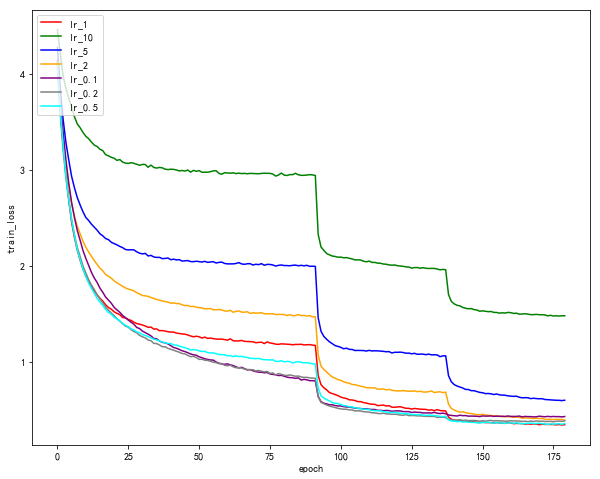

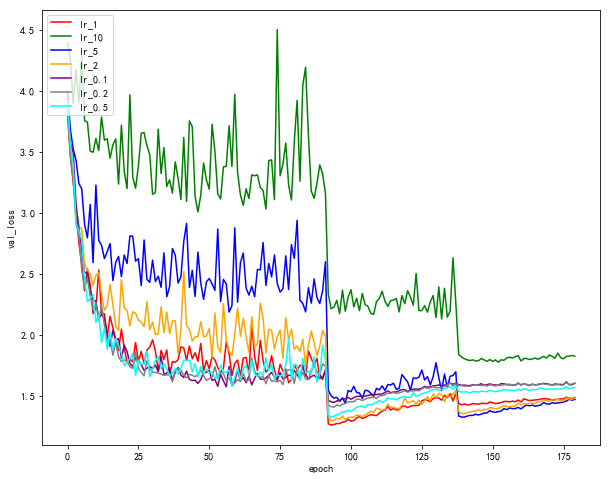

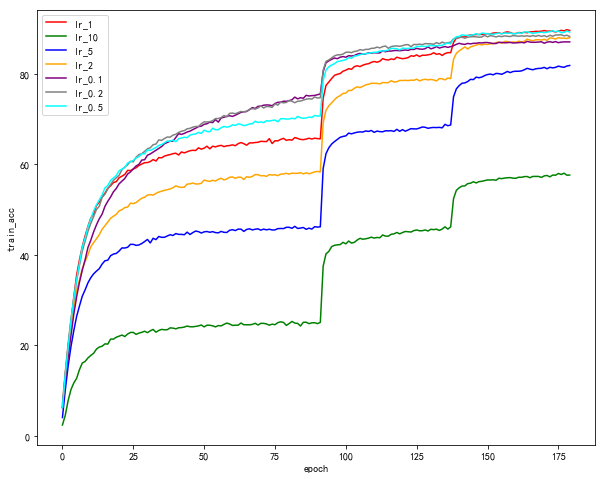

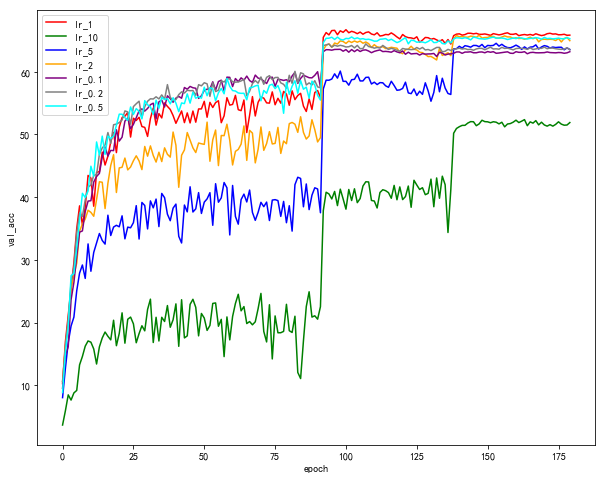

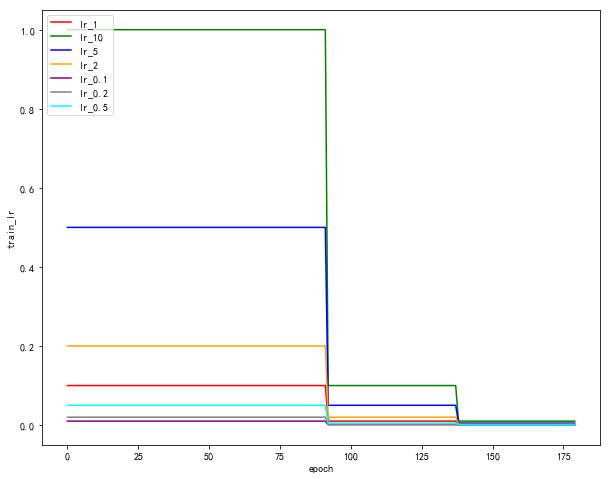

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

legend_lr = ['lr_1', 'lr_10', 'lr_5', 'lr_2', 'lr_0.1', 'lr_0.2', 'lr_0.5']
plt_different_history(history_lr, legend_lr)

## The basic training and testing pipeline

### What if we double the number of training epochs? What if we half it? **Note that the learning rate policy should be adjusted accordingly (please specify details)**

* `epochs_multipliers = [1, 2, 0.5]` - define epochs multipliers (base epoch is 180)
* `history_epochs = []` - define train/validation logs' container
* `auto_resnet(20, 100, 1, 180/epoch_m, history_epochs)`:
    * `[3, 3, 3]` - ResNet20 model
    * `100` - CIFAR100 dataset
    * `epoch_m` - learning rate multiplier (base learning rate is 1*0.1)
    * `180/epoch_m` - number of epochs

In [5]:
%%time
from auto_resnet import *

epochs_multipliers = [1, 2, 0.5]
history_epochs = []

for epoch_m in epochs_multipliers:
    auto_resnet_opt_task1_epochs_multiplier([3, 3, 3], 100, epoch_m, 180/epoch_m, history_epochs, [int(91/epoch_m), int(137/epoch_m])

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

100%|██████████| 625/625 [00:12<00:00, 50.24it/s, loss:1.1885, acc:65.2625%]
Val loss: 1.6044, accuracy: 57.35%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.16it/s, loss:1.1683, acc:65.5600%]
Val loss: 1.7706, accuracy: 54.53%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.88it/s, loss:1.1819, acc:65.3525%]
Val loss: 1.8382, accuracy: 53.30%
Epoch: 80/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.68it/s, loss:1.1854, acc:65.3000%]
Val loss: 1.6471, accuracy: 56.15%
Epoch: 81/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.87it/s, loss:1.1789, acc:65.3200%]
Val loss: 1.6591, accuracy: 56.71%
Epoch: 82/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.86it/s, loss:1.1766, acc:65.5500%]
Val loss: 1.6925, accuracy: 56.05%
Epoch: 83/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.77it/s, loss:1.1718, acc:65.6625%]
Val loss: 1.7273, accuracy: 55.67%
Epoch: 84/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.83it/s, loss:0.4820, acc:84.9625%]
Val loss: 1.5446, accuracy: 64.07%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.11it/s, loss:0.4746, acc:85.0525%]
Val loss: 1.4882, accuracy: 64.81%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.53it/s, loss:0.4859, acc:84.5425%]
Val loss: 1.5089, accuracy: 64.57%
Epoch: 139/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 51.49it/s, loss:0.4146, acc:87.0375%]
Val loss: 1.4368, accuracy: 65.78%
Epoch: 140/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.24it/s, loss:0.3899, acc:88.1200%]
Val loss: 1.4322, accuracy: 65.79%
Epoch: 141/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.09it/s, loss:0.3854, acc:88.1825%]
Val loss: 1.4363, accuracy: 65.63%
Epoch: 142/180, lr:1.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.45it/s, loss:0.3779, acc:88.3350%]
Val loss: 1.4376, accuracy: 65.36%
Epoch: 143/180, lr:1.00e-03
100%|██████████| 625

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/90, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.20it/s, loss:4.1397, acc:5.8025%]
Val loss: 3.9180, accuracy: 9.50%
Epoch: 2/90, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.19it/s, loss:3.6575, acc:13.0975%]
Val loss: 3.5138, accuracy: 15.82%
Epoch: 3/90, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 51.45it/s, loss:3.2898, acc:19.5775%]
Val loss: 3.4213, accuracy: 19.16%
Epoch: 4/90, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.20it/s, loss:2.9939, acc:24.8125%]
Val loss: 3.0125, accuracy: 25.74%
Epoch: 5/90, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.80it/s, loss:2.7576, acc:29.4475%]
Val loss: 3.0367, accuracy: 26.04%
Epoch: 6/90, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.53it/s, loss:2.5511, acc:33.6000%]
Val loss: 2.6398, accuracy: 33.29%
Epoch: 7/90, lr:2.00e-01
100%|██████████| 625/625 [00:12<00:00, 49

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/360, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.40it/s, loss:4.0790, acc:6.5400%]
Val loss: 3.8644, accuracy: 9.79%
Epoch: 2/360, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.79it/s, loss:3.6413, acc:13.2800%]
Val loss: 3.6330, accuracy: 14.87%
Epoch: 3/360, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.71it/s, loss:3.2352, acc:20.1575%]
Val loss: 3.3439, accuracy: 19.93%
Epoch: 4/360, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.28it/s, loss:2.9102, acc:25.7450%]
Val loss: 2.9604, accuracy: 26.24%
Epoch: 5/360, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.06it/s, loss:2.6665, acc:30.6000%]
Val loss: 2.8104, accuracy: 28.63%
Epoch: 6/360, lr:5.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.62it/s, loss:2.4460, acc:35.1525%]
Val loss: 2.6494, accuracy: 31.95%
Epoch: 7/360, lr:5.00e-02
100%|██████████| 625/625 [00:12<00

100%|██████████| 625/625 [00:12<00:00, 49.79it/s, loss:0.4563, acc:85.9975%]
Val loss: 1.5177, accuracy: 64.59%
Epoch: 119/360, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.07it/s, loss:0.4536, acc:85.8200%]
Val loss: 1.5148, accuracy: 64.44%
Epoch: 120/360, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 50.16it/s, loss:0.4588, acc:85.7675%]
Val loss: 1.5153, accuracy: 64.62%
Epoch: 121/360, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.67it/s, loss:0.4523, acc:85.9500%]
Val loss: 1.5274, accuracy: 64.72%
Epoch: 122/360, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.13it/s, loss:0.4529, acc:85.8425%]
Val loss: 1.5372, accuracy: 64.33%
Epoch: 123/360, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.92it/s, loss:0.4502, acc:85.9975%]
Val loss: 1.5368, accuracy: 64.37%
Epoch: 124/360, lr:5.00e-03
100%|██████████| 625/625 [00:12<00:00, 49.94it/s, loss:0.4450, acc:86.2200%]
Val loss: 1.5385, accuracy: 64.21%
Epoch: 125/360, lr:5.00e-03
100%|██████████| 625

100%|██████████| 625/625 [00:12<00:00, 48.94it/s, loss:0.3166, acc:90.1950%]
Val loss: 1.6656, accuracy: 64.33%
Epoch: 235/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 49.60it/s, loss:0.3178, acc:90.3275%]
Val loss: 1.6767, accuracy: 64.35%
Epoch: 236/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 48.73it/s, loss:0.3194, acc:90.1825%]
Val loss: 1.6644, accuracy: 64.30%
Epoch: 237/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 50.04it/s, loss:0.3178, acc:90.1975%]
Val loss: 1.6594, accuracy: 64.38%
Epoch: 238/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 49.57it/s, loss:0.3166, acc:90.3225%]
Val loss: 1.6682, accuracy: 64.22%
Epoch: 239/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 50.56it/s, loss:0.3130, acc:90.4700%]
Val loss: 1.6739, accuracy: 64.45%
Epoch: 240/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 49.45it/s, loss:0.3210, acc:89.9725%]
Val loss: 1.6544, accuracy: 64.82%
Epoch: 241/360, lr:5.00e-04
100%|██████████| 625

100%|██████████| 625/625 [00:12<00:00, 48.74it/s, loss:0.2904, acc:91.0550%]
Val loss: 1.7302, accuracy: 64.23%
Epoch: 351/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 49.32it/s, loss:0.2868, acc:91.3525%]
Val loss: 1.7423, accuracy: 64.06%
Epoch: 352/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 50.07it/s, loss:0.2881, acc:91.0625%]
Val loss: 1.7320, accuracy: 64.27%
Epoch: 353/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 49.45it/s, loss:0.2906, acc:90.9375%]
Val loss: 1.7480, accuracy: 64.12%
Epoch: 354/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 49.94it/s, loss:0.2878, acc:91.1275%]
Val loss: 1.7430, accuracy: 63.95%
Epoch: 355/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 49.68it/s, loss:0.2853, acc:91.1175%]
Val loss: 1.7254, accuracy: 64.01%
Epoch: 356/360, lr:5.00e-04
100%|██████████| 625/625 [00:12<00:00, 49.73it/s, loss:0.2927, acc:90.8800%]
Val loss: 1.7396, accuracy: 64.15%
Epoch: 357/360, lr:5.00e-04
100%|██████████| 625

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


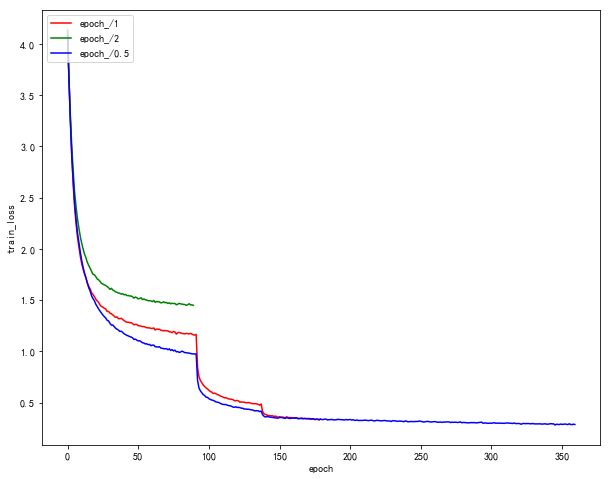

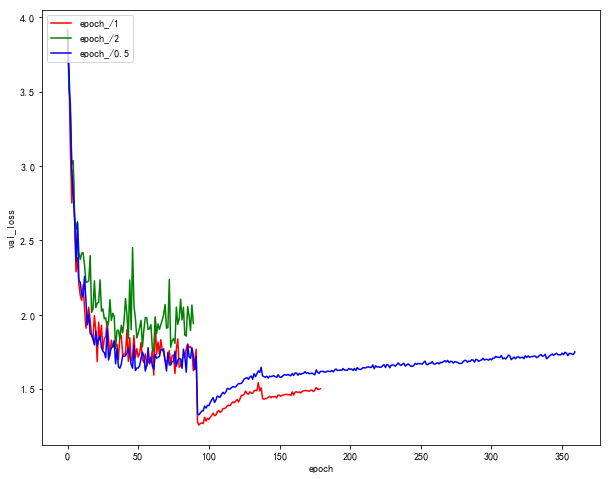

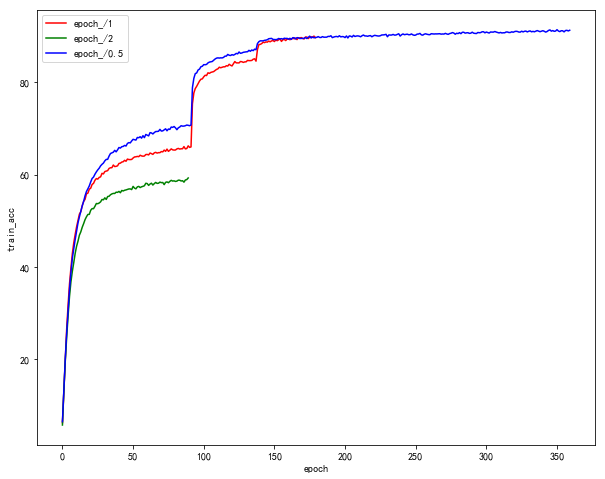

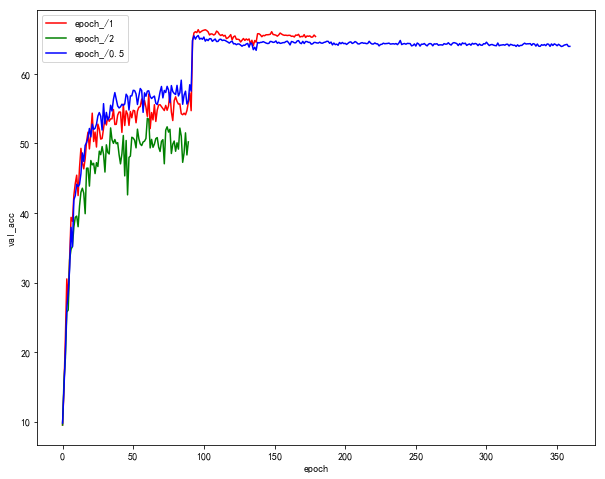

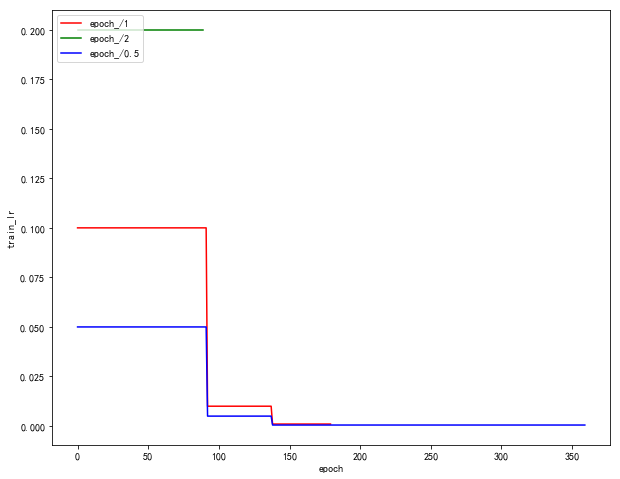

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

legend_epochs = ['epoch_/1', 'epoch_/2', 'epoch_/0.5']
plt_different_history(history_epochs, legend_epochs)

## The basic training and testing pipeline

### What if we only use 1/2 or 1/5 of training data? What if we double or half the size of mini-batch? Note that for fair comparison, you need to keep the number of training samples (iterations x batchsize) unchanged

* `data_part_values = [0.8, 0.5, 0.2]` - define data parts multipliers (base ratio train/validation sub datasets is 0.8/0.2)
* `batch_sizes = [128, 64, 32]` - define batch size valuses (base batch size is 64)
* `history_batch = []` - define train/validation logs' container
* `auto_resnet([3, 3, 3], 100, 1, 180, history_batch, data_part_i, batch_i)`:
    * `[3, 3, 3]` - ResNet20 model
    * `100` - CIFAR100 dataset
    * `1` - learning rate multiplier
    * `180` - number of epochs

In [7]:
%%time
from auto_resnet import *

data_part_values = [0.8, 0.5, 0.2]
batch_sizes = [128, 64, 32]
history_batch = []

for data_part_i in data_part_values:
    for batch_i in batch_sizes:
        auto_resnet([3, 3, 3], 100, 1, 180, history_batch, data_part_i, batch_i)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

100%|██████████| 313/313 [00:08<00:00, 35.97it/s, loss:0.9979, acc:69.9500%]
Val loss: 1.9173, accuracy: 53.85%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 313/313 [00:08<00:00, 35.18it/s, loss:0.9900, acc:70.1075%]
Val loss: 1.7111, accuracy: 57.48%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 313/313 [00:08<00:00, 36.46it/s, loss:0.9903, acc:70.2100%]
Val loss: 1.9764, accuracy: 54.11%
Epoch: 80/180, lr:1.00e-01
100%|██████████| 313/313 [00:08<00:00, 36.39it/s, loss:0.9926, acc:70.4100%]
Val loss: 1.7998, accuracy: 55.29%
Epoch: 81/180, lr:1.00e-01
100%|██████████| 313/313 [00:08<00:00, 36.02it/s, loss:0.9831, acc:70.3150%]
Val loss: 1.7952, accuracy: 56.64%
Epoch: 82/180, lr:1.00e-01
100%|██████████| 313/313 [00:08<00:00, 35.85it/s, loss:0.9788, acc:70.7175%]
Val loss: 1.9322, accuracy: 53.78%
Epoch: 83/180, lr:1.00e-01
100%|██████████| 313/313 [00:08<00:00, 35.66it/s, loss:0.9744, acc:70.6625%]
Val loss: 1.8011, accuracy: 55.93%
Epoch: 84/180, lr:1.00e-01
100%|██████████| 313/313 [0

100%|██████████| 313/313 [00:08<00:00, 36.55it/s, loss:0.3914, acc:87.8325%]
Val loss: 1.6605, accuracy: 62.92%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 313/313 [00:08<00:00, 36.16it/s, loss:0.3944, acc:87.7150%]
Val loss: 1.6315, accuracy: 63.56%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 313/313 [00:08<00:00, 36.04it/s, loss:0.4003, acc:87.4475%]
Val loss: 1.6438, accuracy: 63.42%
Epoch: 139/180, lr:1.00e-03
100%|██████████| 313/313 [00:08<00:00, 36.72it/s, loss:0.3577, acc:88.9325%]
Val loss: 1.6026, accuracy: 63.70%
Epoch: 140/180, lr:1.00e-03
100%|██████████| 313/313 [00:08<00:00, 36.33it/s, loss:0.3485, acc:89.6725%]
Val loss: 1.5969, accuracy: 64.00%
Epoch: 141/180, lr:1.00e-03
100%|██████████| 313/313 [00:08<00:00, 36.18it/s, loss:0.3434, acc:89.5650%]
Val loss: 1.6002, accuracy: 63.87%
Epoch: 142/180, lr:1.00e-03
100%|██████████| 313/313 [00:08<00:00, 36.90it/s, loss:0.3402, acc:89.8325%]
Val loss: 1.5998, accuracy: 63.87%
Epoch: 143/180, lr:1.00e-03
100%|██████████| 313

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.42it/s, loss:4.0847, acc:6.5650%]
Val loss: 3.8274, accuracy: 10.04%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.16it/s, loss:3.6234, acc:13.2175%]
Val loss: 3.4962, accuracy: 16.46%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.40it/s, loss:3.2714, acc:19.6250%]
Val loss: 3.2740, accuracy: 21.18%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.30it/s, loss:2.9478, acc:25.5175%]
Val loss: 2.9179, accuracy: 27.44%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.74it/s, loss:2.6950, acc:30.2550%]
Val loss: 2.7555, accuracy: 30.18%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.74it/s, loss:2.4817, acc:34.7025%]
Val loss: 2.6714, accuracy: 33.01%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<0

100%|██████████| 625/625 [00:12<00:00, 50.62it/s, loss:1.2382, acc:63.9500%]
Val loss: 1.6045, accuracy: 57.00%
Epoch: 60/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 48.90it/s, loss:1.2278, acc:64.3225%]
Val loss: 1.7153, accuracy: 55.72%
Epoch: 61/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.22it/s, loss:1.2287, acc:64.1800%]
Val loss: 1.7899, accuracy: 54.86%
Epoch: 62/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.45it/s, loss:1.2318, acc:64.1800%]
Val loss: 1.7049, accuracy: 54.83%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.44it/s, loss:1.2209, acc:64.3225%]
Val loss: 2.0252, accuracy: 51.06%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 49.06it/s, loss:1.2204, acc:64.4925%]
Val loss: 1.6715, accuracy: 55.52%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 625/625 [00:12<00:00, 50.26it/s, loss:1.2256, acc:64.3950%]
Val loss: 1.8111, accuracy: 53.62%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 625/625 [0

100%|██████████| 625/625 [00:12<00:00, 49.78it/s, loss:0.5344, acc:83.4950%]
Val loss: 1.4031, accuracy: 65.38%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.24it/s, loss:0.5224, acc:83.6475%]
Val loss: 1.4199, accuracy: 65.21%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 48.67it/s, loss:0.5237, acc:83.6200%]
Val loss: 1.4471, accuracy: 64.95%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.70it/s, loss:0.5239, acc:83.5950%]
Val loss: 1.4113, accuracy: 65.30%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 50.72it/s, loss:0.5240, acc:83.5650%]
Val loss: 1.4472, accuracy: 64.89%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.61it/s, loss:0.5167, acc:83.7700%]
Val loss: 1.4549, accuracy: 64.86%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 625/625 [00:12<00:00, 49.60it/s, loss:0.5157, acc:83.8975%]
Val loss: 1.4353, accuracy: 64.97%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 625

100%|██████████| 1250/1250 [00:21<00:00, 58.81it/s, loss:1.9740, acc:46.5125%]
Val loss: 2.1235, accuracy: 44.58%
Epoch: 14/180, lr:1.00e-01
100%|██████████| 1250/1250 [00:21<00:00, 59.37it/s, loss:1.9404, acc:47.0425%]
Val loss: 2.0640, accuracy: 46.12%
Epoch: 15/180, lr:1.00e-01
100%|██████████| 1250/1250 [00:21<00:00, 59.47it/s, loss:1.9007, acc:48.0150%]
Val loss: 2.1727, accuracy: 43.88%
Epoch: 16/180, lr:1.00e-01
100%|██████████| 1250/1250 [00:21<00:00, 58.29it/s, loss:1.8558, acc:49.0775%]
Val loss: 2.0199, accuracy: 46.14%
Epoch: 17/180, lr:1.00e-01
100%|██████████| 1250/1250 [00:21<00:00, 58.38it/s, loss:1.8191, acc:49.9400%]
Val loss: 2.0926, accuracy: 45.23%
Epoch: 18/180, lr:1.00e-01
100%|██████████| 1250/1250 [00:22<00:00, 56.53it/s, loss:1.7998, acc:50.5475%]
Val loss: 2.2452, accuracy: 44.10%
Epoch: 19/180, lr:1.00e-01
100%|██████████| 1250/1250 [00:21<00:00, 58.56it/s, loss:1.7811, acc:50.6650%]
Val loss: 2.0173, accuracy: 47.44%
Epoch: 20/180, lr:1.00e-01
100%|████████

100%|██████████| 1250/1250 [00:21<00:00, 57.34it/s, loss:0.7361, acc:77.4600%]
Val loss: 1.4067, accuracy: 64.65%
Epoch: 130/180, lr:1.00e-02
100%|██████████| 1250/1250 [00:21<00:00, 58.21it/s, loss:0.7252, acc:77.8575%]
Val loss: 1.4680, accuracy: 63.51%
Epoch: 131/180, lr:1.00e-02
100%|██████████| 1250/1250 [00:21<00:00, 57.04it/s, loss:0.7315, acc:77.5325%]
Val loss: 1.4209, accuracy: 63.84%
Epoch: 132/180, lr:1.00e-02
100%|██████████| 1250/1250 [00:21<00:00, 59.05it/s, loss:0.7298, acc:77.5550%]
Val loss: 1.4508, accuracy: 63.54%
Epoch: 133/180, lr:1.00e-02
100%|██████████| 1250/1250 [00:21<00:00, 58.77it/s, loss:0.7187, acc:78.0700%]
Val loss: 1.4461, accuracy: 63.55%
Epoch: 134/180, lr:1.00e-02
100%|██████████| 1250/1250 [00:21<00:00, 56.97it/s, loss:0.7259, acc:77.6700%]
Val loss: 1.4571, accuracy: 63.30%
Epoch: 135/180, lr:1.00e-02
100%|██████████| 1250/1250 [00:21<00:00, 58.17it/s, loss:0.7311, acc:77.5225%]
Val loss: 1.4357, accuracy: 63.90%
Epoch: 136/180, lr:1.00e-02
100%|█

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 196/196 [00:05<00:00, 35.47it/s, loss:4.2284, acc:4.6560%]
Val loss: 4.1002, accuracy: 6.10%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 196/196 [00:05<00:00, 35.70it/s, loss:3.8981, acc:8.9040%]
Val loss: 3.8673, accuracy: 10.24%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 196/196 [00:05<00:00, 35.97it/s, loss:3.6864, acc:12.1000%]
Val loss: 3.6722, accuracy: 12.28%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 196/196 [00:05<00:00, 36.62it/s, loss:3.4760, acc:15.7560%]
Val loss: 3.3831, accuracy: 17.72%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 196/196 [00:05<00:00, 34.99it/s, loss:3.2596, acc:19.4440%]
Val loss: 3.6006, accuracy: 17.68%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 196/196 [00:05<00:00, 35.06it/s, loss:3.0522, acc:22.9760%]
Val loss: 3.0962, accuracy: 23.49%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 196/196 [00:05<00:

100%|██████████| 196/196 [00:05<00:00, 36.25it/s, loss:0.2909, acc:91.5040%]
Val loss: 1.9601, accuracy: 59.23%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 196/196 [00:05<00:00, 35.19it/s, loss:0.2837, acc:91.6160%]
Val loss: 1.9552, accuracy: 59.37%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 196/196 [00:05<00:00, 36.06it/s, loss:0.2811, acc:91.7880%]
Val loss: 1.9918, accuracy: 59.35%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 196/196 [00:05<00:00, 36.41it/s, loss:0.2775, acc:91.9360%]
Val loss: 1.9624, accuracy: 59.54%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 196/196 [00:05<00:00, 35.58it/s, loss:0.2744, acc:92.0480%]
Val loss: 1.9819, accuracy: 59.37%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 196/196 [00:05<00:00, 35.18it/s, loss:0.2697, acc:92.0400%]
Val loss: 1.9999, accuracy: 59.54%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 196/196 [00:05<00:00, 35.19it/s, loss:0.2703, acc:92.1800%]
Val loss: 2.0024, accuracy: 59.23%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 196

100%|██████████| 391/391 [00:07<00:00, 49.60it/s, loss:2.0396, acc:44.4600%]
Val loss: 2.2905, accuracy: 40.87%
Epoch: 14/180, lr:1.00e-01
100%|██████████| 391/391 [00:08<00:00, 48.40it/s, loss:1.9721, acc:45.7080%]
Val loss: 2.2673, accuracy: 41.05%
Epoch: 15/180, lr:1.00e-01
100%|██████████| 391/391 [00:08<00:00, 48.75it/s, loss:1.9149, acc:47.3520%]
Val loss: 2.2718, accuracy: 41.76%
Epoch: 16/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 49.36it/s, loss:1.8737, acc:48.2360%]
Val loss: 2.2175, accuracy: 43.19%
Epoch: 17/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 50.77it/s, loss:1.8086, acc:49.8440%]
Val loss: 2.1496, accuracy: 44.42%
Epoch: 18/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 50.39it/s, loss:1.7785, acc:50.1920%]
Val loss: 2.1738, accuracy: 43.70%
Epoch: 19/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 50.17it/s, loss:1.7229, acc:51.8840%]
Val loss: 1.9819, accuracy: 47.23%
Epoch: 20/180, lr:1.00e-01
100%|██████████| 391/391 [0

100%|██████████| 391/391 [00:07<00:00, 49.84it/s, loss:1.1301, acc:66.4640%]
Val loss: 2.0534, accuracy: 51.53%
Epoch: 73/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 49.75it/s, loss:1.1061, acc:67.0000%]
Val loss: 2.2694, accuracy: 48.56%
Epoch: 74/180, lr:1.00e-01
100%|██████████| 391/391 [00:08<00:00, 47.65it/s, loss:1.1137, acc:66.9920%]
Val loss: 1.9663, accuracy: 52.36%
Epoch: 75/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 49.89it/s, loss:1.1104, acc:66.7840%]
Val loss: 2.0841, accuracy: 51.30%
Epoch: 76/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 49.77it/s, loss:1.1100, acc:67.0840%]
Val loss: 1.9870, accuracy: 50.63%
Epoch: 77/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 49.69it/s, loss:1.0924, acc:67.3560%]
Val loss: 2.0143, accuracy: 50.57%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 391/391 [00:07<00:00, 49.00it/s, loss:1.1105, acc:66.9520%]
Val loss: 1.9465, accuracy: 52.30%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 391/391 [0

100%|██████████| 391/391 [00:07<00:00, 49.92it/s, loss:0.3373, acc:89.5120%]
Val loss: 1.9283, accuracy: 60.47%
Epoch: 132/180, lr:1.00e-02
100%|██████████| 391/391 [00:07<00:00, 49.74it/s, loss:0.3347, acc:89.5080%]
Val loss: 1.9499, accuracy: 59.94%
Epoch: 133/180, lr:1.00e-02
100%|██████████| 391/391 [00:07<00:00, 50.04it/s, loss:0.3355, acc:89.4960%]
Val loss: 1.9552, accuracy: 60.41%
Epoch: 134/180, lr:1.00e-02
100%|██████████| 391/391 [00:07<00:00, 49.94it/s, loss:0.3273, acc:89.9440%]
Val loss: 1.9492, accuracy: 60.17%
Epoch: 135/180, lr:1.00e-02
100%|██████████| 391/391 [00:07<00:00, 50.55it/s, loss:0.3308, acc:89.6360%]
Val loss: 1.9878, accuracy: 59.56%
Epoch: 136/180, lr:1.00e-02
100%|██████████| 391/391 [00:07<00:00, 49.75it/s, loss:0.3300, acc:89.8120%]
Val loss: 1.9600, accuracy: 60.09%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 391/391 [00:07<00:00, 50.14it/s, loss:0.3203, acc:90.0480%]
Val loss: 1.9661, accuracy: 59.95%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 391

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 782/782 [00:13<00:00, 57.56it/s, loss:4.2331, acc:4.6160%]
Val loss: 3.9744, accuracy: 8.12%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 782/782 [00:13<00:00, 58.95it/s, loss:3.8473, acc:9.7400%]
Val loss: 3.6224, accuracy: 13.64%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 782/782 [00:13<00:00, 57.54it/s, loss:3.5477, acc:14.9840%]
Val loss: 3.3269, accuracy: 19.36%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 782/782 [00:13<00:00, 57.64it/s, loss:3.2844, acc:19.5680%]
Val loss: 3.3477, accuracy: 19.01%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 782/782 [00:13<00:00, 57.80it/s, loss:3.0537, acc:23.5760%]
Val loss: 3.3132, accuracy: 22.01%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 782/782 [00:13<00:00, 57.62it/s, loss:2.8530, acc:27.2480%]
Val loss: 3.0658, accuracy: 25.94%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 782/782 [00:13<00:

100%|██████████| 782/782 [00:13<00:00, 57.77it/s, loss:0.5788, acc:82.0880%]
Val loss: 1.6659, accuracy: 61.08%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 782/782 [00:13<00:00, 58.45it/s, loss:0.5824, acc:81.8720%]
Val loss: 1.6674, accuracy: 61.23%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 782/782 [00:13<00:00, 57.65it/s, loss:0.5664, acc:82.4640%]
Val loss: 1.6971, accuracy: 60.88%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 782/782 [00:13<00:00, 59.09it/s, loss:0.5714, acc:82.6200%]
Val loss: 1.6986, accuracy: 60.72%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 782/782 [00:13<00:00, 58.95it/s, loss:0.5646, acc:82.6080%]
Val loss: 1.7127, accuracy: 60.50%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 782/782 [00:13<00:00, 56.69it/s, loss:0.5611, acc:82.5000%]
Val loss: 1.7423, accuracy: 59.95%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 782/782 [00:13<00:00, 59.14it/s, loss:0.5504, acc:82.7640%]
Val loss: 1.6934, accuracy: 61.16%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 782

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|██████████| 782/782 [00:13<00:00, 58.59it/s, loss:0.4020, acc:87.6000%]
Val loss: 1.7145, accuracy: 61.64%
Epoch: 141/180, lr:1.00e-03
100%|██████████| 782/782 [00:13<00:00, 59.05it/s, loss:0.3842, acc:88.4920%]
Val loss: 1.6877, accuracy: 62.05%
Epoch: 142/180, lr:1.00e-03
100%|██████████| 782/782 [00:13<00:00, 58.16it/s, loss:0.3813, acc:88.6720%]
Val loss: 1.7073, accuracy: 61.83%
Epoch: 143/180, lr:1.00e-03
100%|██████████| 782/782 [00:13<00:00, 56.22it/s, loss:0.3702, acc:88.9320%]
Val loss: 1.7000, accuracy: 61.90%
Epoch: 144/180, lr:1.00e-03
100%|██████████| 782/782 [00:13<00:00, 57.31it/s, loss:0.3689, acc:89.2000%]
Val loss: 1.6956, accuracy: 62.00%
Epoch: 145/180, lr:1.00e-03
100%|██████████| 782/782 [00:13<00:00, 56.73it/s, loss:0.3622, acc:89.3080%]
Val loss: 1.6797, accuracy: 62.16%
Epoch: 146/180, lr:1.00e-03
100%|██████████| 782/782 [00:13<00:00, 57.29it/s, loss:0.3644, acc:89.2720%]
Val loss: 1.7071, accuracy: 61.91%
Epoch: 147/180, lr:1.00e-03
100%|██████████| 782

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 34.12it/s, loss:4.4263, acc:2.7700%]
Val loss: 4.3124, accuracy: 3.85%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 33.89it/s, loss:4.1290, acc:5.3000%]
Val loss: 4.0822, accuracy: 5.76%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 35.36it/s, loss:3.9965, acc:7.0200%]
Val loss: 4.0828, accuracy: 7.12%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 35.09it/s, loss:3.8842, acc:8.8100%]
Val loss: 3.8724, accuracy: 9.05%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 33.48it/s, loss:3.8095, acc:10.1700%]
Val loss: 3.9323, accuracy: 9.17%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 35.54it/s, loss:3.7133, acc:10.8600%]
Val loss: 3.8978, accuracy: 9.86%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 33.22it/s, loss:3

100%|██████████| 79/79 [00:02<00:00, 33.14it/s, loss:1.2340, acc:63.0400%]
Val loss: 2.9643, accuracy: 38.07%
Epoch: 61/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 34.21it/s, loss:1.1252, acc:66.2100%]
Val loss: 3.1102, accuracy: 37.87%
Epoch: 62/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 33.27it/s, loss:1.1463, acc:65.4400%]
Val loss: 3.1532, accuracy: 37.67%
Epoch: 63/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 34.30it/s, loss:1.1972, acc:64.3500%]
Val loss: 3.0107, accuracy: 37.68%
Epoch: 64/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 34.06it/s, loss:1.1193, acc:66.2900%]
Val loss: 3.1572, accuracy: 36.98%
Epoch: 65/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 34.47it/s, loss:1.0325, acc:68.8100%]
Val loss: 3.3421, accuracy: 36.81%
Epoch: 66/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 34.53it/s, loss:1.0850, acc:68.1200%]
Val loss: 3.1748, accuracy: 37.51%
Epoch: 67/180, lr:1.00e-01
100%|██████████| 79/79 [00:02<00:00, 34.8

100%|██████████| 79/79 [00:02<00:00, 35.01it/s, loss:0.1829, acc:95.8800%]
Val loss: 3.2945, accuracy: 44.52%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 79/79 [00:02<00:00, 33.47it/s, loss:0.1874, acc:95.7400%]
Val loss: 3.3368, accuracy: 44.40%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 79/79 [00:02<00:00, 34.64it/s, loss:0.1835, acc:95.6800%]
Val loss: 3.3600, accuracy: 44.31%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 79/79 [00:02<00:00, 34.22it/s, loss:0.1822, acc:95.8300%]
Val loss: 3.3207, accuracy: 44.64%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 79/79 [00:02<00:00, 33.66it/s, loss:0.1735, acc:96.3200%]
Val loss: 3.3104, accuracy: 44.42%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 79/79 [00:02<00:00, 34.69it/s, loss:0.1746, acc:95.9700%]
Val loss: 3.3458, accuracy: 44.49%
Epoch: 126/180, lr:1.00e-02
100%|██████████| 79/79 [00:02<00:00, 32.25it/s, loss:0.1740, acc:95.9800%]
Val loss: 3.3513, accuracy: 44.14%
Epoch: 127/180, lr:1.00e-02
100%|██████████| 79/79 [00:02<00:0

100%|██████████| 157/157 [00:03<00:00, 47.88it/s, loss:2.5768, acc:32.7900%]
Val loss: 3.0534, accuracy: 26.33%
Epoch: 17/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 48.49it/s, loss:2.5262, acc:33.8700%]
Val loss: 2.9522, accuracy: 28.30%
Epoch: 18/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 47.76it/s, loss:2.4531, acc:35.5100%]
Val loss: 2.9472, accuracy: 28.48%
Epoch: 19/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 47.65it/s, loss:2.3782, acc:36.7100%]
Val loss: 2.9061, accuracy: 29.34%
Epoch: 20/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 47.45it/s, loss:2.3278, acc:37.9900%]
Val loss: 2.7950, accuracy: 31.70%
Epoch: 21/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 49.64it/s, loss:2.2649, acc:39.1900%]
Val loss: 2.8417, accuracy: 31.36%
Epoch: 22/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 48.95it/s, loss:2.2007, acc:40.5700%]
Val loss: 3.0074, accuracy: 30.38%
Epoch: 23/180, lr:1.00e-01
100%|██████████| 157/157 [0

100%|██████████| 157/157 [00:03<00:00, 47.82it/s, loss:0.8828, acc:72.5000%]
Val loss: 3.0553, accuracy: 40.49%
Epoch: 76/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 49.88it/s, loss:0.9129, acc:72.0000%]
Val loss: 3.2344, accuracy: 38.35%
Epoch: 77/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 47.50it/s, loss:0.8749, acc:72.8500%]
Val loss: 3.1539, accuracy: 39.38%
Epoch: 78/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 47.67it/s, loss:0.8694, acc:72.9900%]
Val loss: 3.0478, accuracy: 41.12%
Epoch: 79/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 47.17it/s, loss:0.8664, acc:73.5700%]
Val loss: 3.0529, accuracy: 42.03%
Epoch: 80/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 47.68it/s, loss:0.8700, acc:72.7400%]
Val loss: 3.1466, accuracy: 40.60%
Epoch: 81/180, lr:1.00e-01
100%|██████████| 157/157 [00:03<00:00, 48.42it/s, loss:0.8405, acc:73.9300%]
Val loss: 3.0479, accuracy: 40.64%
Epoch: 82/180, lr:1.00e-01
100%|██████████| 157/157 [0

100%|██████████| 157/157 [00:03<00:00, 47.19it/s, loss:0.1252, acc:97.2500%]
Val loss: 3.2217, accuracy: 47.45%
Epoch: 135/180, lr:1.00e-02
100%|██████████| 157/157 [00:03<00:00, 49.94it/s, loss:0.1281, acc:96.9500%]
Val loss: 3.2139, accuracy: 47.60%
Epoch: 136/180, lr:1.00e-02
100%|██████████| 157/157 [00:03<00:00, 47.76it/s, loss:0.1248, acc:97.2700%]
Val loss: 3.1920, accuracy: 47.47%
Epoch: 137/180, lr:1.00e-02
100%|██████████| 157/157 [00:03<00:00, 47.02it/s, loss:0.1224, acc:97.3900%]
Val loss: 3.2109, accuracy: 47.60%
Epoch: 138/180, lr:1.00e-02
100%|██████████| 157/157 [00:03<00:00, 48.62it/s, loss:0.1205, acc:97.1300%]
Val loss: 3.2073, accuracy: 47.54%
Epoch: 139/180, lr:1.00e-03
100%|██████████| 157/157 [00:03<00:00, 48.47it/s, loss:0.1155, acc:97.6400%]
Val loss: 3.2541, accuracy: 47.35%
Epoch: 140/180, lr:1.00e-03
100%|██████████| 157/157 [00:03<00:00, 48.69it/s, loss:0.1099, acc:97.6700%]
Val loss: 3.2198, accuracy: 47.64%
Epoch: 141/180, lr:1.00e-03
100%|██████████| 157

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch: 1/180, lr:1.00e-01
100%|██████████| 313/313 [00:05<00:00, 57.46it/s, loss:4.3511, acc:3.5400%]
Val loss: 4.2924, accuracy: 4.42%
Epoch: 2/180, lr:1.00e-01
100%|██████████| 313/313 [00:05<00:00, 57.74it/s, loss:4.1149, acc:5.1400%]
Val loss: 4.0972, accuracy: 5.42%
Epoch: 3/180, lr:1.00e-01
100%|██████████| 313/313 [00:05<00:00, 57.78it/s, loss:4.0037, acc:7.0000%]
Val loss: 4.0010, accuracy: 6.81%
Epoch: 4/180, lr:1.00e-01
100%|██████████| 313/313 [00:05<00:00, 54.02it/s, loss:3.8895, acc:8.1700%]
Val loss: 3.8252, accuracy: 10.16%
Epoch: 5/180, lr:1.00e-01
100%|██████████| 313/313 [00:05<00:00, 56.81it/s, loss:3.7670, acc:10.4600%]
Val loss: 3.7423, accuracy: 11.76%
Epoch: 6/180, lr:1.00e-01
100%|██████████| 313/313 [00:05<00:00, 56.67it/s, loss:3.6288, acc:13.0600%]
Val loss: 3.7144, accuracy: 13.58%
Epoch: 7/180, lr:1.00e-01
100%|██████████| 313/313 [00:05<00:00, 

100%|██████████| 313/313 [00:05<00:00, 56.15it/s, loss:0.2519, acc:92.9500%]
Val loss: 2.9450, accuracy: 47.62%
Epoch: 119/180, lr:1.00e-02
100%|██████████| 313/313 [00:05<00:00, 55.98it/s, loss:0.2515, acc:92.9400%]
Val loss: 2.9922, accuracy: 47.44%
Epoch: 120/180, lr:1.00e-02
100%|██████████| 313/313 [00:05<00:00, 56.57it/s, loss:0.2561, acc:92.9600%]
Val loss: 3.0006, accuracy: 47.55%
Epoch: 121/180, lr:1.00e-02
100%|██████████| 313/313 [00:05<00:00, 55.97it/s, loss:0.2369, acc:93.3800%]
Val loss: 3.0260, accuracy: 47.56%
Epoch: 122/180, lr:1.00e-02
100%|██████████| 313/313 [00:05<00:00, 57.81it/s, loss:0.2400, acc:93.5500%]
Val loss: 3.0130, accuracy: 47.33%
Epoch: 123/180, lr:1.00e-02
100%|██████████| 313/313 [00:05<00:00, 56.75it/s, loss:0.2343, acc:93.6100%]
Val loss: 3.0303, accuracy: 47.49%
Epoch: 124/180, lr:1.00e-02
100%|██████████| 313/313 [00:05<00:00, 56.40it/s, loss:0.2325, acc:93.3500%]
Val loss: 3.0288, accuracy: 47.45%
Epoch: 125/180, lr:1.00e-02
100%|██████████| 313

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


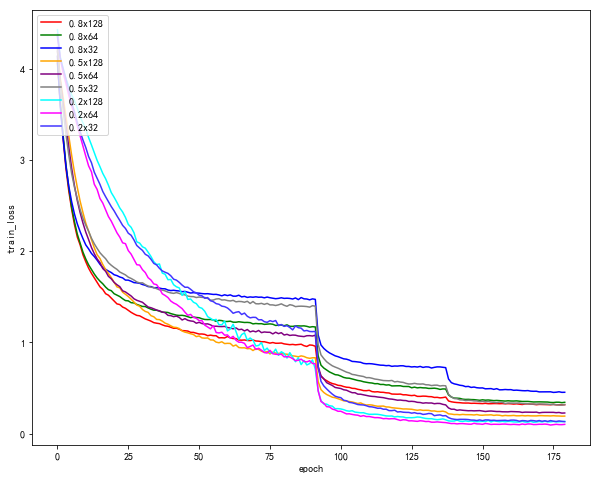

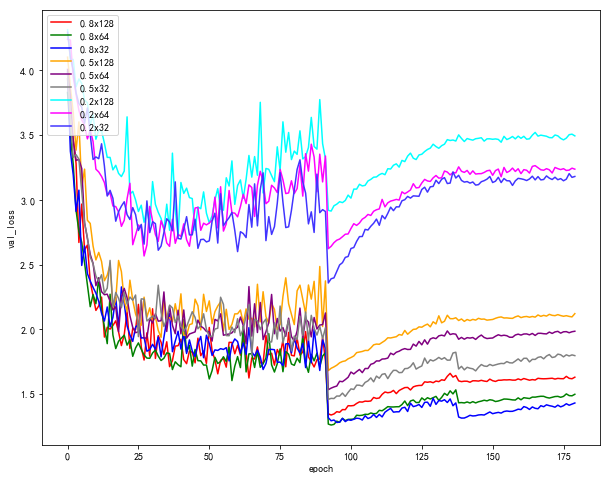

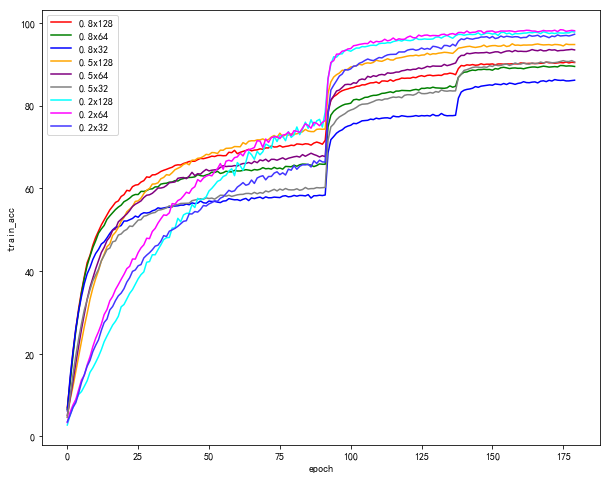

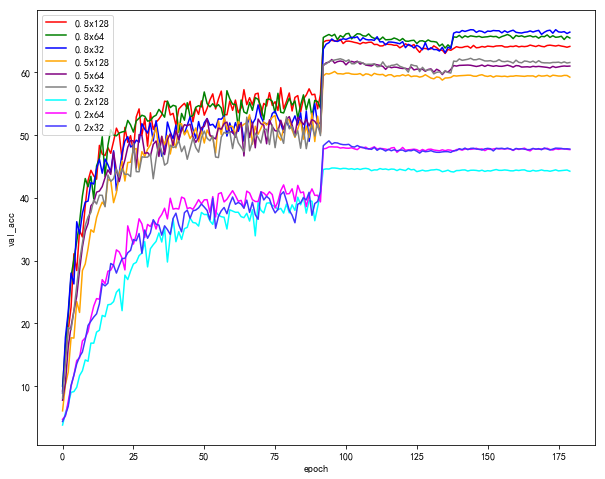

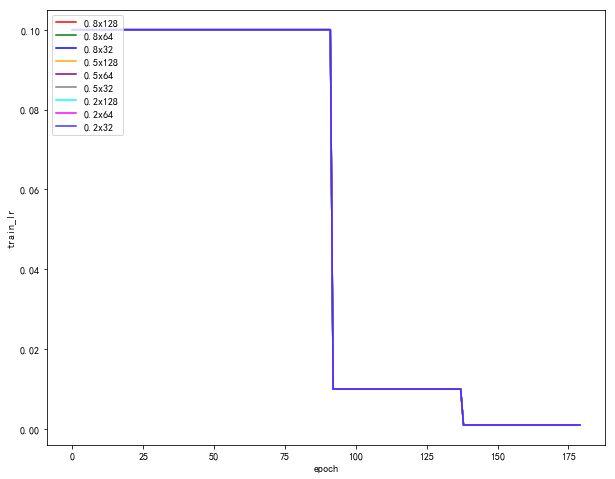

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

legend_batch = ['0.8x128', '0.8x64', '0.8x32', '0.5x128', '0.5x64', '0.5x32', '0.2x128', '0.2x64', '0.2x32']
plt_different_history(history_batch, legend_batch)